In [1]:
import yfinance as yf

In [2]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year-10, end.month, end.day)

In [3]:
stock = "TSLA"
tesla = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [4]:
tesla.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-06-17,14.940667,15.702667,14.856667,15.444667,15.444667,199573500
2014-06-18,15.433333,15.447333,15.074667,15.141333,15.141333,104103000
2014-06-19,15.258667,15.687333,15.133333,15.186000,15.186000,131896500
2014-06-20,15.234667,15.419333,15.080000,15.306000,15.306000,73558500
2014-06-23,15.300667,15.932667,15.214667,15.814667,15.814667,116866500


In [5]:
tesla.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-06-10,176.059998,178.570007,173.169998,173.789993,173.789993,50869700
2024-06-11,173.919998,174.750000,167.410004,170.660004,170.660004,64761900
2024-06-12,171.119995,180.550003,169.800003,177.289993,177.289993,90389400
2024-06-13,188.389999,191.080002,181.229996,182.470001,182.470001,118984100
2024-06-14,185.800003,186.000000,176.919998,178.009995,178.009995,81361700


In [6]:
tesla.shape

(2517, 6)

In [7]:
tesla.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2014-06-17 to 2024-06-14
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2517 non-null   float64
 1   High       2517 non-null   float64
 2   Low        2517 non-null   float64
 3   Close      2517 non-null   float64
 4   Adj Close  2517 non-null   float64
 5   Volume     2517 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 137.6 KB


In [8]:
tesla.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [9]:
tesla1=tesla.reset_index()["Close"]

In [10]:
tesla1.shape

(2517,)

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

<Axes: xlabel='Date'>

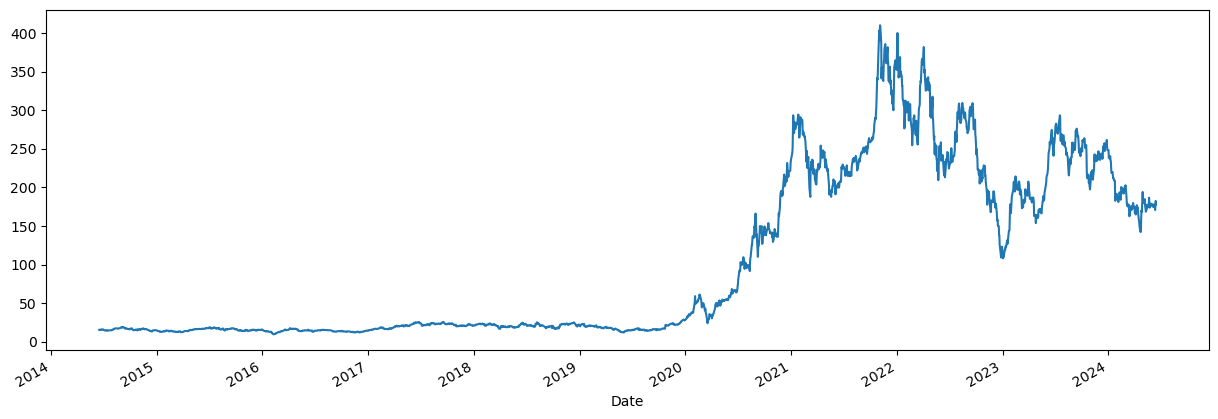

In [12]:
plt.figure(figsize = (15,5))
tesla['Close'].plot()

In [13]:
import numpy as np

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
tesla1=scaler.fit_transform(np.array(tesla1).reshape(-1,1))

In [15]:
tesla1

array([[0.01465231],
       [0.01389471],
       [0.01400627],
       ...,
       [0.41886949],
       [0.43180683],
       [0.42066773]])

In [16]:
#splitting data into train and test
training_size = int (len(tesla)*0.65)
test_size = len(tesla1)-training_size
train_data,test_data=tesla1[0:training_size,:],tesla1[training_size:len(tesla1),:1]

In [17]:
training_size,test_size

(1636, 881)

In [18]:
import numpy as np

def create_dataset(dataset, time_step=1):
    datax, datay = [], []

    for i in range(len(dataset) - time_step - 1):
        a = dataset[i: (i + time_step), 0]

        datax.append(a)
        datay.append(dataset[i + time_step, 0])

    return np.array(datax), np.array(datay)

time_step = 100
X_train, Y_train = create_dataset(train_data, time_step)

X_test, Y_test = create_dataset(test_data, time_step)


In [19]:
print(X_train.shape),print(Y_train.shape)

(1535, 100)
(1535,)


(None, None)

In [20]:
print(X_test.shape),print(Y_test.shape)

(780, 100)
(780,)


(None, None)

In [21]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [22]:
#create LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [23]:
model=Sequential()
model.add(LSTM(50,return_sequences = True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss= "mean_squared_error",optimizer= "adam")

C:\Users\manik\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - loss: 0.0036 - val_loss: 0.0053
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - loss: 2.6408e-04 - val_loss: 0.0082
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 2.7910e-04 - val_loss: 0.0053
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - loss: 2.4339e-04 - val_loss: 0.0067
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - loss: 1.9917e-04 - val_loss: 0.0081
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 1.9194e-04 - val_loss: 0.0035
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 1.9221e-04 - val_loss: 0.0032
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 1.4072e-04 - val_loss: 0.0040
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - loss: 1.4345e-04 - val_loss: 0.0025
Epoch 10/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 1.2957e-04 - val_loss: 0.0024
Epoch 11/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - loss: 1.4041e-04 - val_loss: 0.0022
Epoch 12/10

In [26]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step


In [27]:
train_predict = scaler.inverse_transform(train_predict)
test_presict = scaler.inverse_transform(test_predict)

In [28]:
#train data RMSE
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(Y_train, train_predict))

43.32445467704958

In [29]:
#test data RMSE
math.sqrt(mean_squared_error(Y_test,test_predict))

0.032503790849058606

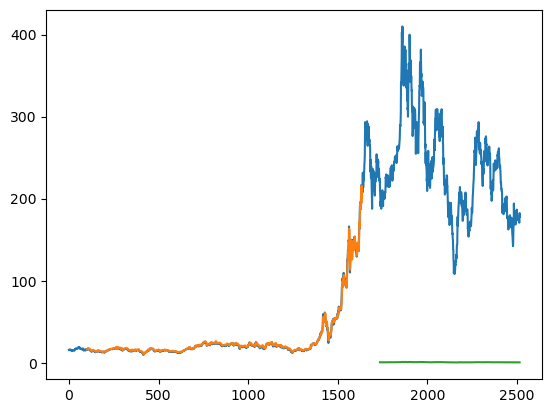

In [35]:
import numpy as np
#train prediction for plotting
look_back = 100
trainpredictplot = np.empty_like(tesla1)
trainpredictplot[:,:] = np.nan
trainpredictplot[look_back:len(train_predict)+look_back,:] = train_predict
#test prediction for plotting
testpredictplot = np.empty_like(tesla1)
testpredictplot[:,:] = np.nan
testpredictplot[len(train_predict)+(look_back*2)+1:len(tesla1)-1,:] = test_predict
#plot baseline and predictions
plt.plot(scaler.inverse_transform(tesla1))
plt.plot(trainpredictplot)
plt.plot(testpredictplot)
plt.show()

In [36]:
#predict future30 days
len(test_data)

881

In [37]:
x_input = test_data[781:].reshape(1,-1)
x_input.shape

(1, 100)

In [38]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [39]:
temp_input

[0.495144761114019,
 0.432206448471072,
 0.4337549187586991,
 0.45293610283251623,
 0.45458449655719196,
 0.4438450136519753,
 0.44776618919919253,
 0.44539352204922755,
 0.42828527292385477,
 0.43837540592675606,
 0.4445693251868897,
 0.4495144682512917,
 0.4595296777312191,
 0.44594298662411946,
 0.4356780447708208,
 0.4473915715843231,
 0.4767128122699407,
 0.4754640360742091,
 0.46000418067351206,
 0.46252673297904995,
 0.4691202697681277,
 0.455533578661028,
 0.47409037463697934,
 0.4749145714993172,
 0.4806839114260571,
 0.4802843320067381,
 0.48218245810478505,
 0.445967948428569,
 0.4274860759755916,
 0.41699632544374615,
 0.42226616251411847,
 0.41399927019591537,
 0.42006834232417595,
 0.41949387783520936,
 0.3993636116575562,
 0.3819307066358382,
 0.3846031059873239,
 0.41015305628129717,
 0.4039591370211635,
 0.41479850525380363,
 0.40770546560835824,
 0.4027353226298815,
 0.4072309245564402,
 0.4198185718411796,
 0.4252132941530501,
 0.4151231611501488,
 0.4136995761040198

In [53]:
#prediction for 30days
from numpy import array

list_output=[]
n_steps = 100
i = 0
while(i<30):
    if(len(temp_input)>100):
        x_input = np.array(temp_input[1:])
        print("{}day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input,verbose = 0)
        print("{}day output".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        list_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1,n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        list_output.extended(yhat.tolist())
        i=i+1
        
        print(lst_output)

0day input [0.38193071 0.38460311 0.41015306 0.40395914 0.41479851 0.40770547
 0.40273532 0.40723092 0.41981857 0.42521329 0.41512316 0.41369958
 0.39224561 0.39661633 0.40343463 0.38792482 0.40810505 0.41784552
 0.40505803 0.41215111 0.40328479 0.37938319 0.3684689  0.36432295
 0.35053645 0.34334353 0.33085577 0.3374243  0.38100662 0.40111189
 0.39639152 0.46072849 0.43382984 0.42561291 0.42566284 0.42860997
 0.43752621 0.42016823 0.4124508  0.40558253 0.3968411  0.40538272
 0.41951888 0.4106276  0.41275049 0.41929411 0.41302523 0.44212173
 0.42591261 0.41000321 0.42373975 0.41752083 0.4161222  0.42261582
 0.42084258 0.41637194 0.41257569 0.41315011 0.42049292 0.41934403
 0.41012806 0.40231074 0.41886949 0.43180683 0.42066773 0.42346588
 0.41970736 0.41624311 0.41329035 0.41145068 0.41084763 0.41121638
 0.41207641 0.41292176 0.41337124 0.41325247 0.41260806 0.41163978
 0.41061708 0.40978506 0.40929863 0.40919748 0.40941992 0.40984294
 0.41032961 0.41076979 0.41110381 0.41132686 0.4114

In [54]:
day_new= np.arange(1,101)
day_pred=np.arange(101,131)

In [55]:
import matplotlib.pyplot as plt

In [56]:
len(tesla1)

2517

In [57]:
newtesla = tesla1.tolist()
newtesla.extend(list_output)

In [64]:
len(newtesla)

2547

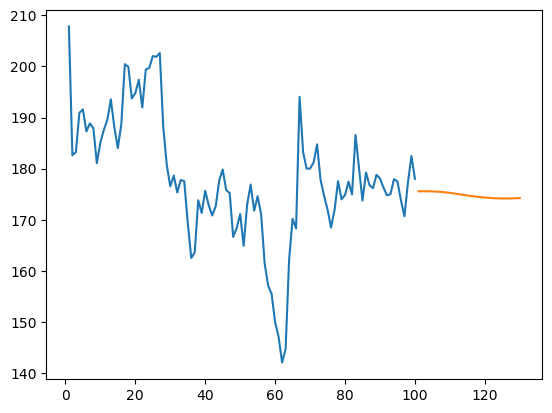

In [68]:
plt.plot(day_new, scaler.inverse_transform(tesla1[2417:]))
plt.plot(day_pred,scaler.inverse_transform(list_output))

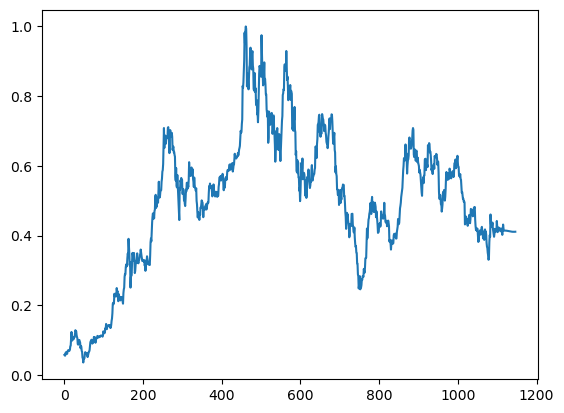

In [73]:
newtesla=tesla1.tolist()
newtesla.extend(list_output)
plt.plot(newtesla[1400:])